In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import libraries

import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick

import seaborn as sns

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [ ]:
#Import data
data = pd.read_excel('/content/drive/MyDrive/Internship Summer 2023/Data_final.xlsx')
data.set_index('Location')
data.index.names = [None]
data.head()

,Location,urbanisation,Population,foreign,terraced_detached,rental,Employment,unemployed,Workplace_selfsufficiency,KESK,...,KESK_num,PS_num,KOK_num,SDP_num,VIHR_num,VAS_num,RKP_num,KD_num,Others_num,Dominating
0,Akaa,88.5,16769,1.6,72.4,20.8,71.9,9.9,67.9,7.6,...,1274.444,3353.800,2800.423,4779.165,1324.751,1257.675,16.769,771.374,1190.599,SDP
1,Alajärvi,60.7,9831,1.9,91.6,16.2,67.7,11.8,99.3,37.7,...,3706.287,2398.764,756.987,521.043,245.775,285.099,19.662,865.128,1032.255,KESK
2,Alavieska,52.6,2610,0.6,97.8,19.9,71.5,8.7,74.7,48.5,...,1265.850,660.330,104.400,117.450,83.520,120.060,5.220,143.550,109.620,KESK
3,Alavus,59.5,11713,1.1,87.0,21.3,69.5,10.1,99.1,34.2,...,4005.846,3701.308,1417.273,1112.735,316.251,222.547,23.426,644.215,257.686,KESK
4,Asikkala,64.4,8248,1.6,77.5,18.1,69.1,12.1,75.4,24.2,...,1996.016,1847.552,1088.736,1072.240,1055.744,338.168,16.496,544.368,288.680,KESK


In [ ]:
#We have 311 cities and 28 variables

In [ ]:
data.describe().round()

,urbanisation,Population,foreign,terraced_detached,rental,Employment,unemployed,Workplace_selfsufficiency,KESK,PS,...,Others,KESK_num,PS_num,KOK_num,SDP_num,VIHR_num,VAS_num,RKP_num,KD_num,Others_num
count,311.0,311.0,311.0,311.0,311.0,311.0,311.0,311.0,311.0,311.0,...,311.0,311.0,311.0,311.0,311.0,311.0,311.0,311.0,311.0,311.0
mean,61.0,17727.0,3.0,82.0,21.0,71.0,11.0,86.0,25.0,18.0,...,9.0,2481.0,3117.0,2994.0,3149.0,2009.0,1439.0,776.0,694.0,1072.0
std,22.0,48336.0,2.0,16.0,7.0,6.0,4.0,20.0,15.0,7.0,...,21.0,3727.0,6962.0,10677.0,7776.0,9831.0,5066.0,3113.0,1488.0,3707.0
min,0.0,92.0,0.0,13.0,7.0,56.0,2.0,34.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
25%,47.0,2790.0,1.0,75.0,16.0,66.0,8.0,72.0,13.0,16.0,...,3.0,740.0,489.0,184.0,314.0,93.0,117.0,0.0,84.0,99.0
50%,60.0,6146.0,2.0,89.0,20.0,70.0,11.0,88.0,27.0,19.0,...,4.0,1441.0,1072.0,566.0,799.0,242.0,349.0,6.0,212.0,236.0
75%,77.0,14662.0,3.0,94.0,23.0,75.0,13.0,99.0,37.0,22.0,...,6.0,2712.0,2820.0,1651.0,2325.0,848.0,1081.0,38.0,629.0,596.0
max,100.0,643272.0,17.0,99.0,49.0,87.0,21.0,171.0,66.0,43.0,...,100.0,41573.0,79122.0,140233.0,87485.0,151169.0,71403.0,34093.0,12222.0,49532.0


In [ ]:
data.corr().style

<ipython-input-5-b6f360a9292e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style


,urbanisation,Population,foreign,terraced_detached,rental,Employment,unemployed,Workplace_selfsufficiency,KESK,PS,KOK,SDP,VIHR,VAS,RKP,KD,Others,KESK_num,PS_num,KOK_num,SDP_num,VIHR_num,VAS_num,RKP_num,KD_num,Others_num
urbanisation,1.000000,0.408569,-0.062160,-0.727679,0.496952,0.024773,0.034767,0.254488,-0.331580,0.188696,0.460878,0.473128,0.523957,0.239201,0.106579,0.075288,-0.388722,0.442132,0.473568,0.361184,0.470884,0.285111,0.345194,0.262531,0.465298,0.332082
Population,0.408569,1.000000,0.282408,-0.641332,0.599745,-0.007205,0.033945,0.253748,-0.270658,-0.046692,0.319098,0.124155,0.583108,0.081776,-0.000746,-0.034492,-0.053101,0.664652,0.972876,0.981767,0.962625,0.967298,0.938332,0.676506,0.847898,0.949244
foreign,-0.062160,0.282408,1.000000,-0.269052,0.212421,0.471157,-0.444229,0.065356,-0.598024,-0.612830,-0.134102,-0.241443,-0.025191,-0.268092,0.288589,-0.221456,0.680939,0.021486,0.252289,0.289220,0.288430,0.264166,0.220310,0.351583,0.201541,0.373866
terraced_detached,-0.727679,-0.641332,-0.269052,1.000000,-0.834109,0.090793,-0.123268,-0.425080,0.488509,0.042131,-0.436242,-0.448676,-0.605326,-0.158264,-0.015650,-0.002310,0.097512,-0.555005,-0.697378,-0.587899,-0.723828,-0.510501,-0.571193,-0.380525,-0.682986,-0.558702
rental,0.496952,0.599745,0.212421,-0.834109,1.000000,-0.341489,0.341146,0.642917,-0.185915,-0.037103,0.214492,0.250827,0.534910,0.209329,-0.093513,-0.006859,-0.095026,0.588215,0.645192,0.542703,0.657804,0.488862,0.550640,0.297309,0.634900,0.524292
Employment,0.024773,-0.007205,0.471157,0.090793,-0.341489,1.000000,-0.931749,-0.416547,-0.533195,-0.351516,0.085831,-0.281496,-0.055141,-0.338081,0.314320,-0.106144,0.472231,-0.132085,-0.026981,0.010784,-0.033798,-0.001899,-0.049713,0.171645,-0.033687,0.071815
unemployed,0.034767,0.033945,-0.444229,-0.123268,0.341146,-0.931749,1.000000,0.342592,0.436987,0.330728,-0.041956,0.327428,0.151660,0.352009,-0.295777,0.074386,-0.453764,0.148120,0.064170,0.011494,0.073478,0.017128,0.068638,-0.159737,0.064136,-0.044936
Workplace_selfsufficiency,0.254488,0.253748,0.065356,-0.425080,0.642917,-0.416547,0.342592,1.000000,0.143535,0.030931,-0.094271,0.140798,0.090727,0.205128,-0.028540,0.057529,-0.195178,0.292764,0.267505,0.208471,0.281123,0.202606,0.254259,0.133279,0.273277,0.217264
KESK,-0.331580,-0.270658,-0.598024,0.488509,-0.185915,-0.533195,0.436987,0.143535,1.000000,0.428406,-0.252524,-0.222609,-0.244299,0.124765,-0.405014,-0.013599,-0.397348,-0.047111,-0.284175,-0.254709,-0.330662,-0.202945,-0.216312,-0.344940,-0.309919,-0.274371
PS,0.188696,-0.046692,-0.612830,0.042131,-0.037103,-0.351516,0.330728,0.030931,0.428406,1.000000,0.319659,0.320091,0.090059,0.217096,-0.460000,0.032988,-0.610227,0.104120,0.029628,-0.048801,-0.024770,-0.064754,-0.030926,-0.270599,-0.040249,-0.119806


<ipython-input-6-44607cf8814e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr().round(2)


<Axes: >

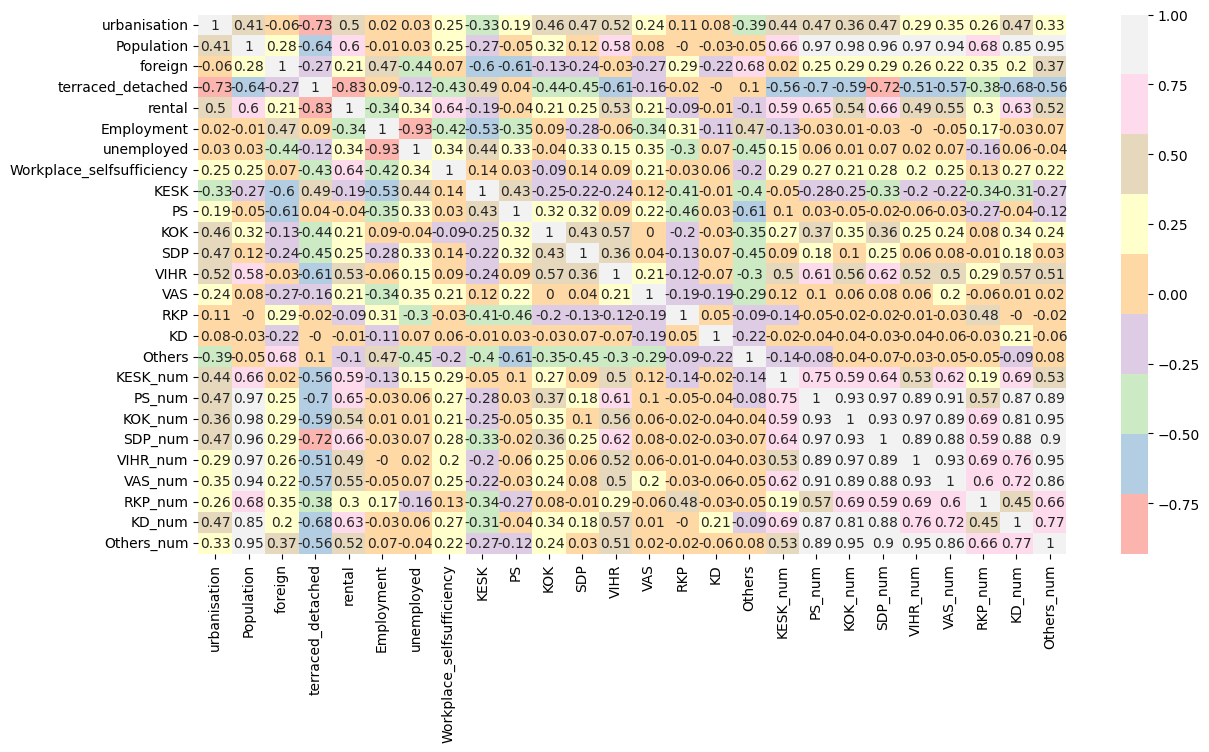

In [ ]:
#DESCRIPTIVE ANALYTICS

#First we draw a correlation heatmap of all variables

correlation = data.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'Pastel1')

In [ ]:
#Looking at the correlation heatmap, we can see that
# KESK seems to be negatively correlated with foreign (-0.6) and employment (-0.53).
# KESK seems to be positively correlated with % of household living in detached/terrace house (0.49) and unemployment rate (0.43)

# PS seems to be negatively correlated with foreign (-0.61)

# SDP seems to be positively correlated with urbanization (0.47) and negatively correlated with  % of household living in detached/terrace house (-0.45)

# VIHR seems to be positively correlated with urbanization (0.52), population (0.58), % of household living in rental homes (0.53) and
# negatively correlated with % of household living in detached/terrace house (-0.61)

# No major correlation for VAS, RKP, and KD

Text(0.5, 1.0, 'Relative distribution of urbanization rate')

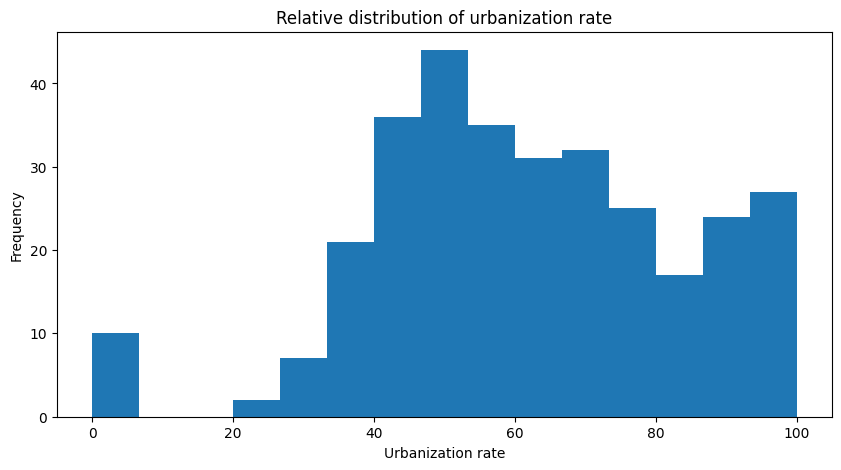

In [ ]:
#Exploratory Analysis

#Distribution of Urbanization rate
ax = data['urbanisation'].plot.hist(bins=15, figsize = (10,5))
ax.set_xlabel('Urbanization rate')
ax.set_title('Relative distribution of urbanization rate')

In [ ]:
#Overall, Finland is pretty urbanized, with the majority of cities having 40% or more of urbanization rate.

Text(0.5, 1.0, 'Relative distribution of Population\t')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


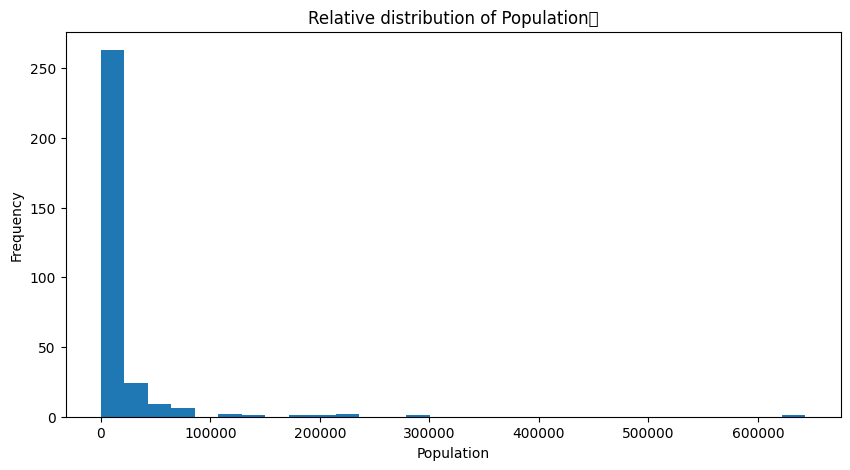

In [ ]:
#Distribution of Urbanization rate
ax1 = data['Population'].plot.hist(bins=30, figsize = (10,5))
ax1.set_xlabel('Population')
ax1.set_title('Relative distribution of Population	')

In [ ]:
#Most cities have <100k population.

In [ ]:
#Check for Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = data.iloc[:,1:9]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                     feature         VIF
0               urbanisation   28.489891
1                 Population    2.069472
2                    foreign    4.667190
3          terraced_detached  174.643414
4                     rental   55.773647
5                 Employment  283.022299
6                 unemployed   25.732745
7  Workplace_selfsufficiency   38.711634


In [ ]:
#VIF score measure how much the variance of a regression coefficient is inflated due to collinearity with other features.
#urbanisation, terraced_detached, rental, Employment, unemployed, and Workplace_selfsufficiency features all have relatively high VIF scores
#--> these features may be highly correlated with each other and maybe redudant in the model.

<Axes: >

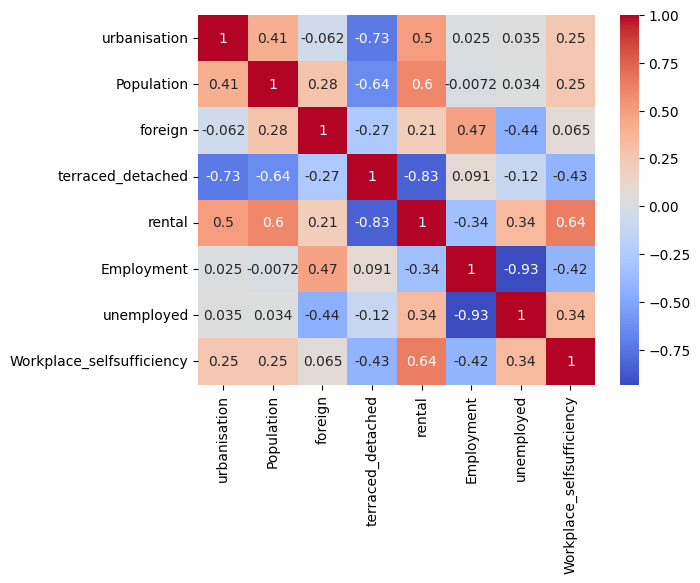

In [ ]:
# Select the features to check for correlation
features = data.iloc[:, 1:9]


# Create a correlation matrix
corr_matrix = features.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
#The following pairs of variables are highly correlated either positively or negatively
#(employed/unemployed --> -0.93)
#(urbanization/terraced --> -0.73)
#(population/terraced --> -0.64),
#(rental/terraced --> -0.83)
#(rental/workplace_selfsufficiency --> 0.64).

# We should consider removing one of the variable in the pair when making a model to reduce risk of multicollinearity.

In [ ]:
#Import important libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
#Split the data into features and target variables

X = data.iloc[:, 1:9]
y = data.iloc[:, 9:18]
y.head()

,KESK,PS,KOK,SDP,VIHR,VAS,RKP,KD,Others
0,7.6,20.0,16.7,28.5,7.9,7.5,0.1,4.6,7.1
1,37.7,24.4,7.7,5.3,2.5,2.9,0.2,8.8,10.5
2,48.5,25.3,4.0,4.5,3.2,4.6,0.2,5.5,4.2
3,34.2,31.6,12.1,9.5,2.7,1.9,0.2,5.5,2.2
4,24.2,22.4,13.2,13.0,12.8,4.1,0.2,6.6,3.5


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1995)

In [ ]:
models = {}

for party in y.columns:
    model = LinearRegression()
    model.fit(X_train, y_train[party])
    models[party] = model

scores = {}

for party, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test[party], y_pred)
    mae = mean_absolute_error(y_test[party], y_pred)
    scores[party] = {'R-squared': r2, 'MAE': mae}

print(pd.DataFrame.from_dict(scores))

               KESK        PS       KOK       SDP      VIHR       VAS  \
R-squared  0.659207  0.318124  0.241927  0.402157  0.636832  0.101193   
MAE        7.088437  4.143413  4.712318  4.751546  1.886041  4.323547   

                RKP        KD    Others  
R-squared  0.144678 -0.334148  0.084489  
MAE        8.485233  2.421434  8.615508  


In [ ]:
for party, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test[party], y_pred)
    mae = mean_absolute_error(y_test[party], y_pred)
    scores[party] = {'R-squared': r2, 'MAE': mae}
    coef = model.coef_
    intercept = model.intercept_
    feature_names = X.columns
    formula = f"{party} = {intercept:.2f} + "
    for i in range(len(feature_names)):
        formula += f"{coef[i]:.2f}*{feature_names[i]} + "
    formula = formula[:-3]  # remove the last '+'
    print(formula)

KESK = 40.03 + 0.08*urbanisation + 0.00*Population + -1.82*foreign + 0.82*terraced_detached + 0.49*rental + -1.33*Employment + -0.95*unemployed + 0.12*Workplace_selfsufficiency
PS = 48.53 + 0.09*urbanisation + 0.00*Population + -1.15*foreign + 0.04*terraced_detached + -0.11*rental + -0.44*Employment + -0.21*unemployed + -0.01*Workplace_selfsufficiency
KOK = 31.00 + -0.02*urbanisation + 0.00*Population + -1.11*foreign + -0.27*terraced_detached + -0.14*rental + 0.20*Employment + 0.06*unemployed + -0.07*Workplace_selfsufficiency
SDP = 68.17 + 0.01*urbanisation + -0.00*Population + -0.75*foreign + -0.49*terraced_detached + -0.53*rental + -0.06*Employment + 0.48*unemployed + -0.02*Workplace_selfsufficiency
VIHR = -23.34 + 0.01*urbanisation + 0.00*Population + -0.48*foreign + -0.02*terraced_detached + 0.31*rental + 0.34*Employment + 0.45*unemployed + -0.05*Workplace_selfsufficiency
VAS = -7.64 + 0.08*urbanisation + -0.00*Population + -0.21*foreign + 0.12*terraced_detached + 0.26*rental + -0.

In [ ]:
# Train the random forest model for each political party
from sklearn.ensemble import RandomForestRegressor

models = {}

for party in y.columns:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train[party])
    models[party] = model


scores = {}

for party, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test[party], y_pred)
    mae = mean_absolute_error(y_test[party], y_pred)
    scores[party] = {'R-squared': r2, 'MAE': mae}

print(pd.DataFrame.from_dict(scores))

               KESK        PS       KOK       SDP      VIHR       VAS  \
R-squared  0.679467  0.266853  0.461336  0.461579  0.632500  0.006366   
MAE        6.636277  3.956745  3.816000  4.613511  1.682777  4.219809   

                RKP        KD    Others  
R-squared  0.220004 -0.226763  0.506926  
MAE        6.715234  2.202117  3.441489  


In [ ]:
# Analyze the feature importances of the models
importances = {}

for party, model in models.items():
    importances[party] = model.feature_importances_

importances_df = pd.DataFrame(importances, index=X.columns)
print(importances_df)

                               KESK        PS       KOK       SDP      VIHR  \
urbanisation               0.074206  0.052635  0.095047  0.054932  0.060177   
Population                 0.062897  0.045160  0.260647  0.067444  0.344596   
foreign                    0.379950  0.111318  0.106768  0.162815  0.068398   
terraced_detached          0.188177  0.050023  0.105257  0.368774  0.072953   
rental                     0.033901  0.070127  0.043620  0.063267  0.168201   
Employment                 0.158273  0.132651  0.128254  0.075319  0.063991   
unemployed                 0.049165  0.495251  0.171039  0.110942  0.117653   
Workplace_selfsufficiency  0.053432  0.042835  0.089367  0.096507  0.104031   

                                VAS       RKP        KD    Others  
urbanisation               0.112997  0.061120  0.115516  0.060415  
Population                 0.105913  0.271426  0.082489  0.072601  
foreign                    0.078232  0.198241  0.094659  0.427357  
terraced_detache

In [ ]:
#USE CROSS-VALIDATION INSTEAD OF TRAIN/TEST FOR LINEAR REGRESSION

from sklearn.model_selection import cross_val_score

model = LinearRegression()

# Perform cross-validation on each political party
for party in y.columns:
    scores = cross_val_score(model, X, y[party], cv=5, scoring='r2')
    mae_scores = cross_val_score(model, X, y[party], cv=5, scoring='neg_mean_absolute_error')
    print("Party: ", party)
    print("Cross-validation scores: ", scores)
    print("Average R-squared: ", scores.mean())
    print("MAE: ", -mae_scores.mean())

Party:  KESK
Cross-validation scores:  [0.72414368 0.59566401 0.69029681 0.65134799 0.70247301]
Average R-squared:  0.6727850994094743
MAE:  6.687994960719275
Party:  PS
Cross-validation scores:  [0.40867462 0.32915745 0.46001741 0.07199921 0.4257602 ]
Average R-squared:  0.339121780598412
MAE:  4.064900813884593
Party:  KOK
Cross-validation scores:  [0.46364057 0.35870759 0.22409428 0.45574266 0.35575521]
Average R-squared:  0.3715880600181049
MAE:  4.165809257612231
Party:  SDP
Cross-validation scores:  [0.48821857 0.33954192 0.54855942 0.36348984 0.28528443]
Average R-squared:  0.4050188372805139
MAE:  4.5656694697292455
Party:  VIHR
Cross-validation scores:  [0.69506482 0.54337371 0.49444589 0.38545556 0.54672601]
Average R-squared:  0.53301319588783
MAE:  1.853546335867985
Party:  VAS
Cross-validation scores:  [0.01499377 0.08023692 0.03573029 0.10993206 0.23031162]
Average R-squared:  0.09424093199389338
MAE:  3.9488999624364474
Party:  RKP
Cross-validation scores:  [-3.40300844 

In [ ]:
##USE CROSS-VALIDATION INSTEAD OF TRAIN/TEST FOR RANDOM FOREST REGRESSOR


model = RandomForestRegressor(n_estimators=100)

# Perform cross-validation on each political party
for party in y.columns:
    scores = cross_val_score(model, X, y[party], cv=5, scoring='r2')
    mae_scores = cross_val_score(model, X, y[party], cv=5, scoring='neg_mean_absolute_error')

    print("Party: ", party)
    print("Cross-validation scores: ", scores)
    print("Average R-squared: ", scores.mean())
    print("MAE: ", -mae_scores.mean())

Party:  KESK
Cross-validation scores:  [0.76333324 0.58455927 0.65028308 0.65016602 0.76197838]
Average R-squared:  0.6820639973837282
MAE:  6.322830926779314
Party:  PS
Cross-validation scores:  [0.56973269 0.35906687 0.47885947 0.33592855 0.54317115]
Average R-squared:  0.4573517472355978
MAE:  3.6936311315924213
Party:  KOK
Cross-validation scores:  [0.62652055 0.43222227 0.24170602 0.42504612 0.59578373]
Average R-squared:  0.46425573920160623
MAE:  3.592267793138761
Party:  SDP
Cross-validation scores:  [0.50490986 0.51627757 0.41311143 0.27870675 0.36721646]
Average R-squared:  0.41604441378178086
MAE:  4.458181413210446
Party:  VIHR
Cross-validation scores:  [0.72179891 0.56730565 0.40345462 0.30591122 0.70093113]
Average R-squared:  0.5398803051890873
MAE:  1.6977454173067081
Party:  VAS
Cross-validation scores:  [ 0.01272827  0.11871681 -0.10302347  0.085198    0.14876601]
Average R-squared:  0.05247712459199296
MAE:  3.897905376344086
Party:  RKP
Cross-validation scores:  [-1

In [ ]:
#Hyperparameter tuning for Random Forest Regressor

from sklearn.model_selection import GridSearchCV

# define the hyperparameters to tune
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [10, 20, 30],
              'min_samples_split': [2, 5, 10]}

# define a dictionary to store the models and their feature importances
models = {}
importances = {}

# loop over all the political parties
for party in y.columns:
    # initialize the random forest regressor
    rf = RandomForestRegressor(random_state=1995)

    # perform grid search cross-validation to tune hyperparameters
    grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
    grid_search.fit(X, y[party])

    # store the best model and its parameters
    models[party] = grid_search.best_estimator_

    # calculate and store feature importances
    importances[party] = models[party].feature_importances_


# print the feature importances for all political parties
for party, importance in importances.items():
    print(f"Feature importances for {party}:")
    for feature, importance_score in zip(X.columns, importance):
        print(f"{feature}: {importance_score}")

KeyboardInterrupt: ignored

In [ ]:
# Define parameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 5, 10,20],
              'min_samples_split': [2, 5, 10]}

# Create dictionary to store best parameters for each party
best_params = {}

# Loop over each political party
for party in y.columns:
    # Create random forest regressor model
    rf = RandomForestRegressor(random_state=1995)

    # Create grid search object with cross-validation
    grid = GridSearchCV(rf, param_grid, cv=5)

    # Fit grid search on training data
    grid.fit(X, y[party])

    # Store best parameters for party in dictionary
    best_params[party] = grid.best_params_

    # Create random forest model with best parameters for party
    rf_best = RandomForestRegressor(**grid.best_params_, random_state=1995)

    # Fit random forest model on training data
    rf_best.fit(X, y[party])

    # Get feature importances for party
    importances = pd.Series(rf_best.feature_importances_, index=X.columns)

    # Sort feature importances in descending order
    importances_sorted = importances.sort_values(ascending=False)

    scores = cross_val_score(rf_best, X, y[party], cv=5, scoring='r2')
    mae_scores = cross_val_score(model, X, y[party], cv=5, scoring='neg_mean_absolute_error')

    # Print results for party
    print('Political Party:', party)
    print('Best Parameters:', best_params[party])
    print("Cross-validation scores: ", scores)
    print("Average R-squared: ", scores.mean())
    print("MAE: ", -mae_scores.mean())
    print('Feature Importances:')
    print(importances_sorted)
    print('-------------------------')

Political Party: KESK
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Cross-validation scores:  [0.75351094 0.58564075 0.63704493 0.64889712 0.76798   ]
Average R-squared:  0.6786147495312289
MAE:  6.370109984639017
Feature Importances:
foreign                      0.369203
urbanisation                 0.195912
terraced_detached            0.119973
Employment                   0.104471
Population                   0.069597
Workplace_selfsufficiency    0.066372
unemployed                   0.041587
rental                       0.032885
dtype: float64
-------------------------
Political Party: PS
Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Cross-validation scores:  [0.56156994 0.39902659 0.47914808 0.33997829 0.56279541]
Average R-squared:  0.46850366136512667
MAE:  3.690495442908346
Feature Importances:
unemployed                   0.580854
foreign                      0.176229
Employment                   0.069821
rental